# Latar Belakang
Sebuah perusahaan yang bergerak di bidang penjualan barang elektronik berbasis *e-commerce*, ingin meningkatkan pelayanannya dalam ketepatan waktu pengiriman. Perusahaan ini ingin menganalisa faktor apa saja yang dapat mempengaruhi keterlambatan pengiriman agar dapat mengambil keputusan bisnis yang tepat. Sebagai informasi tambahan, Perusahaan ini memiliki gudang tersendiri dalam menyimpan stok barangnya dan langsung menangani pengirimannya tanpa melalui pihak ketiga.


## Pernyataan Masalah
Perusahaan ingin mengetahui **pengiriman mana saja yang mengalami keterlambatan pengiriman**. Informasi ini akan membantu perusahaan untuk memperbaiki, mengoptimalisasi, dan meningkatkan efektifitas sistem pengiriman.

Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:

**Bagaimana karakteristik pengiriman yang terlambat?**

# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data pelanggan yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://drive.google.com/drive/folders/1qDcYH_h5-7v6Z9h6MlWiEC8wtY7TFp9Z).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

Ada 14 kolom di dalam dataset online_retail_shipping, yaitu:  

* ID : Nomor ID Pelanggan.
* Warehouse_block : Perusahaan mempunyai Gudang yang besar dan dibagi ke dalam 5 blok yaitu A, B, C, D, dan E.
* Mode_of_Shipment : Perusahaan mengirimkan produknya dengan berbagai cara seperti *Flight*, *Ship*, dan *Road*.
* Customer_care_calls : Jumlah panggilan yang dibuat dari penyelidikan untuk penyelidikan pengiriman.
* Customer_rating : Penilaian yang diberikan oleh pelanggan. 1 adalah yang terendah (Terburuk), 5 adalah yang tertinggi (Terbaik).
* Cost_of_the_Product : Harga produk dalam US Dollar.
* Prior_purchases : Jumlah Pembelian Sebelumnya.
* Product_importance : Perusahaan telah mengkategorikan produk dalam berbagai parameter seperti *low*, *medium*, dan *high*.
* Gender : Male dan Female
* Discount_offered : Diskon yang ditawarkan pada produk tertentu.
* Weight_in_gms : Berat dalam gram
* Reached.on.Time_Y.N : 1 – Menunjukkan bahwa produk TIDAK sampai tepat waktu dan 0 – menunjukkan bahwa produk telah sampai tepat waktu.


Berikut 5 baris teratas dan terbawah dari dataset online_retail_shipping.

In [ ]:
# Mengambil data dari google drive

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/Capstone Project Module 2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/Capstone Project Module 2


In [ ]:
df = pd.read_csv('online_retail_shipping.csv')
# display(df.head(),df.tail())
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.


In [ ]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (10999, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [ ]:
display(df.describe(), df.describe(include='object'))

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


In [ ]:
pd.set_option('display.max_colwidth', -1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,10999,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Warehouse_block,5,"[D, F, A, B, C]"
2,Mode_of_Shipment,3,"[Flight, Ship, Road]"
3,Customer_care_calls,6,"[4, 2, 3, 5, 6, 7]"
4,Customer_rating,5,"[2, 5, 3, 1, 4]"
5,Cost_of_the_Product,215,"[177, 216, 183, 176, 184, 162, 250, 233, 150, 164, 189, 232, 198, 275, 152, 227, 143, 239, 145, 161, 156, 211, 251, 225, 172, 234, 266, 257, 223, 149, 137, 181, 215, 269, 139, 174, 151, 210, 169, 160, 190, 141, 165, 170, 203, 246, 238, 193, 221, 179, 105, 261, 202, 109, 158, 231, 206, 187, 230, 113, 180, 132, 217, 197, 185, 278, 229, 186, 286, 175, 219, 213, 235, 271, 144, 218, 263, 168, 265, 205, 252, 222, 220, 147, 200, 224, 247, 280, 157, 207, 237, 264, 248, 191, 146, 135, 98, 97, 114, 112, ...]"
6,Prior_purchases,8,"[3, 2, 4, 6, 5, 7, 10, 8]"
7,Product_importance,3,"[low, medium, high]"
8,Gender,2,"[F, M]"
9,Discount_offered,65,"[44, 59, 48, 10, 46, 12, 3, 11, 29, 32, 1, 43, 45, 6, 36, 18, 38, 51, 2, 28, 24, 31, 61, 22, 4, 62, 16, 56, 15, 9, 40, 37, 41, 17, 64, 52, 49, 39, 14, 33, 21, 13, 23, 26, 57, 7, 35, 8, 5, 53, 55, 47, 65, 25, 50, 60, 20, 19, 63, 58, 34, 54, 27, 42, 30]"


Secara umum, kita dapat melihat temuan sebagai berikut :
- Dataset online_retail_shipping memiliki 12 kolom dan 10999 baris.
- Tidak ada data kosong dalam dataset ini.
- Kolom `Reached.on.Time_Y.N` merupakan variabel target yang berisi nilai boolean/binary dimana:
  - 0 : Produk sampai tepat waktu
  - 1 : Produk TIDAK sampai tepat waktu

- Untuk Data Numerik :
  - Jumlah panggilan yang dibuat untuk memperoleh update pengiriman:
    - Rata-rata sebanyak 4 kali
    - Minimum sebanyak 2 kali
    - Maksimum sebanyak 7 kali
  - Rating yang diberikan pelanggan rata-rata sebesar 3 (dalam skala 1-5)
  - Harga produk yang terjual dalam USD:
    - Rata-rata sebesar $210
    - Minimum sebesar $96
    - Maksimum sebesar $310
  - Banyaknya pembelian sebelumnya yang dilakukan oleh tiap pelanggan:
    - Rata-rata sebanyak 3.5 (antara 3 sampai 4 kali)
    - Minimum sebanyak 2 kali
    - Maksimum sebanyak 10 kali
  - Diskon yang ditawrkan pada produk tertentu:
    - Rata-rata sebesar 13%
    - Minimum sebesar 1%
    - Maksimum sebesar 65%
  - Berat produk dalam gram:
    - Rata-rata beratnya sekitar 3634 gram
    - Minimum sebesar 1001 gram
    - Maksimum sebesar 7846 gram
  
- Untuk Data Kategorik :
  - Kolom `Warehouse_block` berisi blok A, B, C, D, F bukan A, B, C, D, E seperti di penjelasan. Mungkin di penjelasannya ada typo, tapi kita abaikan saja dan tetap mengikuti data apa adanya. Kolom ini didominasi oleh blok F, kemungkinan blok F merupakan gudang yang paling besar.
  - Perusahaan paling banyak menggunakan metode pengiriman *Ship*.
  - `Produk Importance` memiliki 3 kategori dan didominasi oleh kategori *low*.
  - Pelanggan yang paling banyak membeli produk dari Perusahaan ini berjenis kelamin *Female*.
  - Banyaknya nilai unik pada setiap data kategorik pada dataset ini masih terbilang normal (berkisar 2-5 nilai unik)


- Kolom ID berisi id unik setiap pelanggan sehingga tidak relevan dalam analisis dan bisa dihapus saja
- Tidak ada issue pada data ini sehingga kita dapat langsung menggunakannya untuk dianalisa lebih lanjut


### Data Cleaning
Pada tahap ini, kita akan membuang kolom ID karena kolom tersebut berisi id unik untuk setiap pelanggan sehingga tidak relevan dalam analisis dan bisa dihapus saja.

In [ ]:
df.drop(columns=['ID'],inplace=True)

Untuk mempermudah analisa, kita tambahkan suatu kolom bernama `Reached` yang mendefinisikan ketepatan waktu pengiriman .

In [ ]:
def Reached_yn(i):
    if i==0:
        return "On Time"
    return "Delayed"
df['Reached'] = df['Reached.on.Time_Y.N'].apply(Reached_yn)
df['Reached'].unique()

array(['Delayed', 'On Time'], dtype=object)

In [ ]:
# Tampilkan 5 baris teratas pada data
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Reached
0,D,Flight,4,2,177,3,low,F,44,1233,1,Delayed
1,F,Flight,4,5,216,2,low,M,59,3088,1,Delayed
2,A,Flight,2,2,183,4,low,M,48,3374,1,Delayed
3,B,Flight,3,3,176,4,medium,M,10,1177,1,Delayed
4,C,Flight,2,2,184,3,medium,F,46,2484,1,Delayed


# Data Analysis
Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu **bagaimana karakteristik pengiriman yang tidak tepat waktu (terlambat)**.  

Analisis akan dilakukan dengan membandingkan data yang pengirimannya tidak tepat waktu (target=1) dan tepat waktu (target=0) berdasarkan fitur yang tersedia.

In [ ]:
df['Reached.on.Time_Y.N'].value_counts()

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

In [ ]:
Reached = df["Reached"].value_counts().reset_index()
Reached.columns = ["Reached","Value"]
Reached.drop("Reached",axis = 1,inplace = True)
Reached["Reached"] = ["Delayed", "On time"]
fig = px.pie(Reached, names = "Reached", values = "Value", color_discrete_sequence = px.colors.sequential.Darkmint_r, hole = 0.5)
fig.update_traces(textinfo='percent+label')

## Analisis Univariat

Pada tahap ini kita akan melakukan analisis dengan memvisualisasikan setiap variabel dari data yang kita miliki. Analisis ini akan membantu kita dalam memperoleh gambaran besar dari data pada variabel yang ada.

In [ ]:
# Grouping kolom berdasarkan tipe datanya
cats = ['Warehouse_block','Product_importance','Mode_of_Shipment','Gender']
nums = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

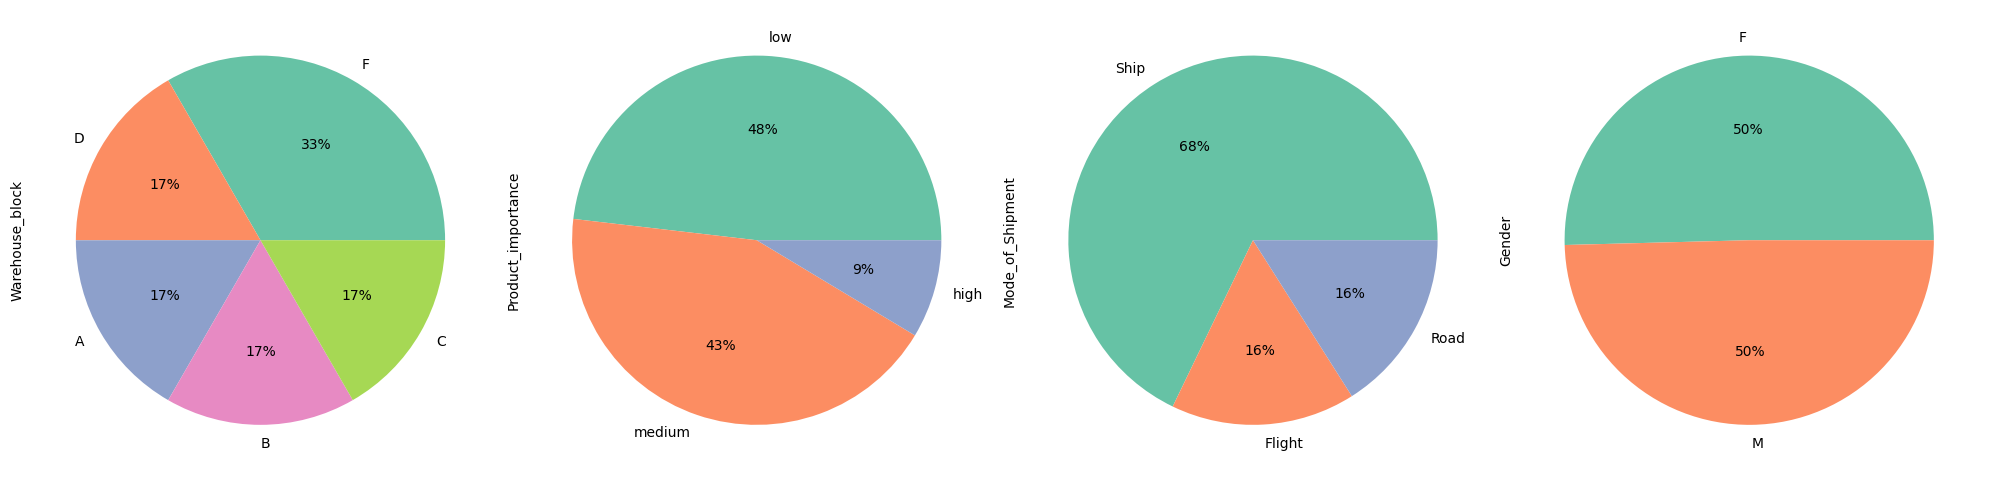

In [ ]:
plt.figure(figsize=(20,12))
for i in range(len(cats)):
    plt.subplot(1,len(cats),i+1)
    x = df[cats[i]].value_counts()
    plot = x.plot.pie(fontsize = 10, autopct='%1.0f%%', colors = sns.color_palette('Set2'))
    plt.tight_layout()

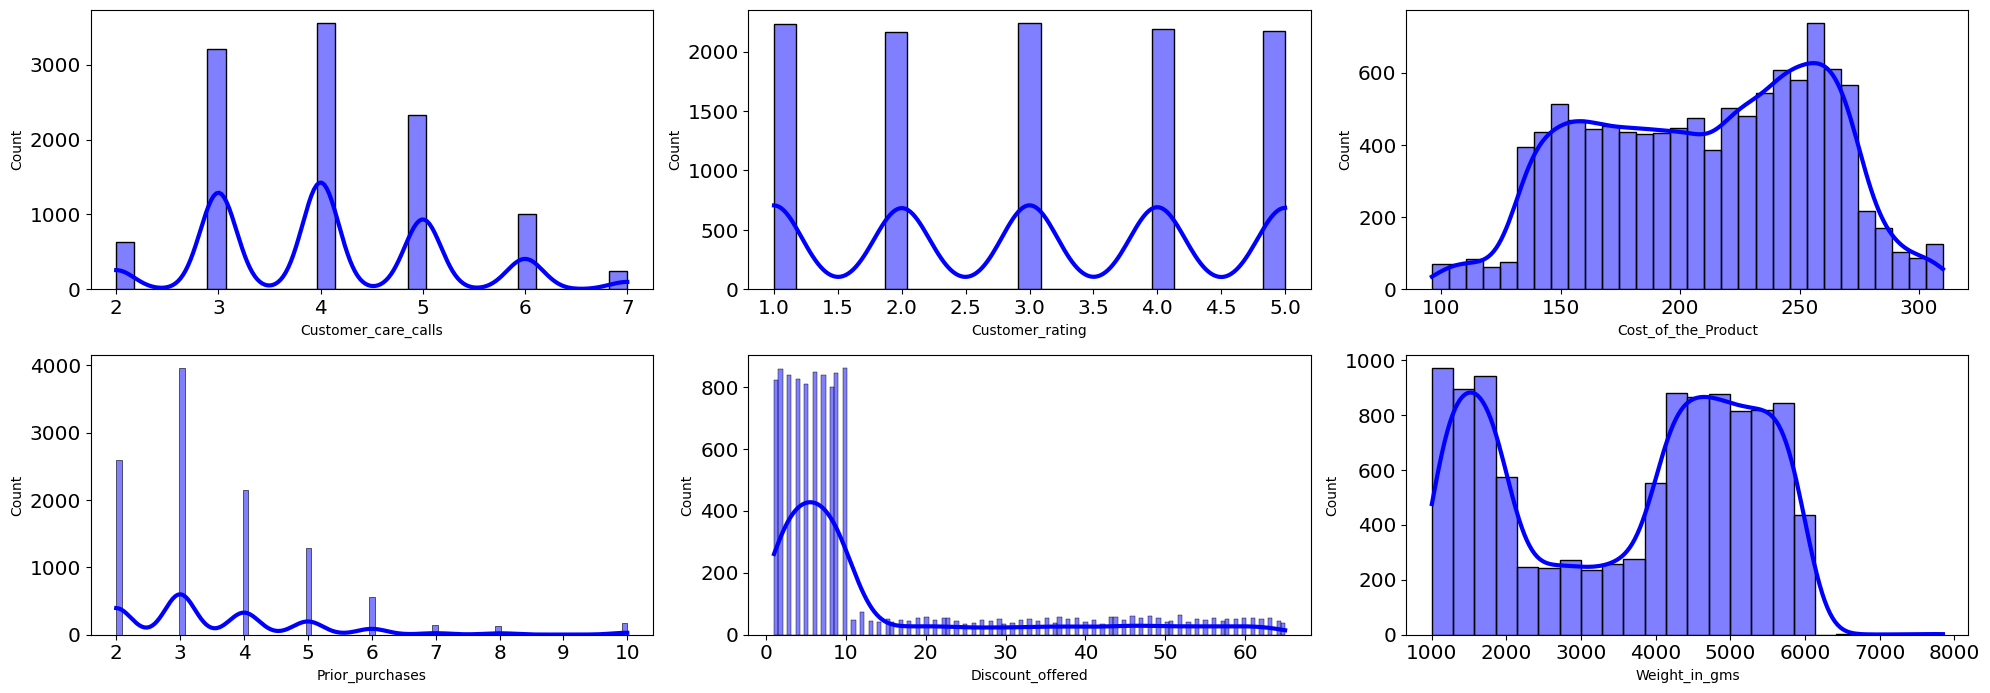

In [ ]:
features = nums
plt.figure(figsize=(20, 10))
for i in range(0, len(nums)):
    plt.subplot(3, 3, i+1)
    sns.histplot(x = df[features[i]], kde=True, color='blue')
    plt.xlabel(features[i])
    plt.tight_layout()

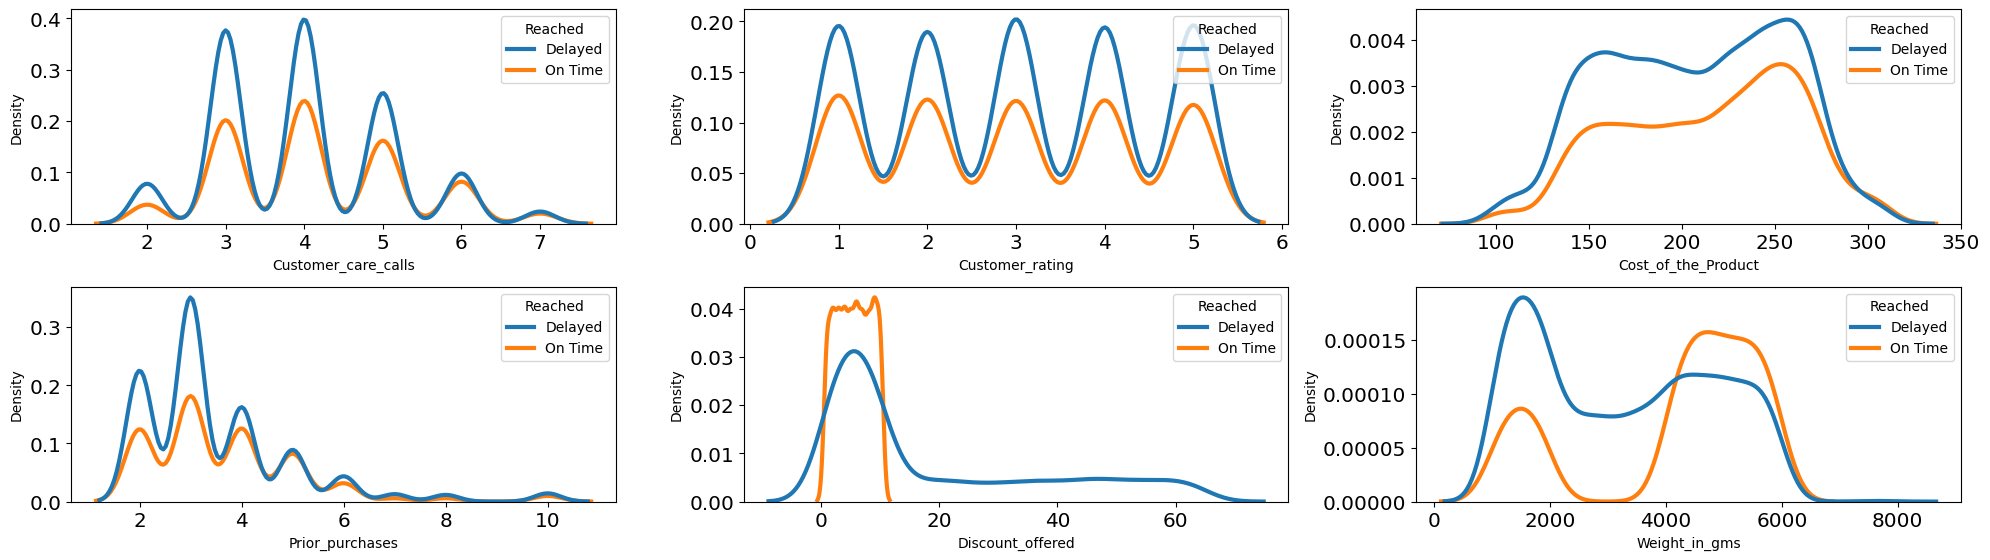

In [ ]:
features = nums
plt.figure(figsize=(20,8))
for i in range(0, len(features)):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(data=df, x=features[i], hue='Reached')
    plt.xlabel(features[i])
    plt.tight_layout()

Secara umum dapat terlihat bahwa :
- Sekitar 60% produk yang terjual mengalami keterlambatan pengiriman, sisanya sebanyak 40% dikirimkan tepat waktu.
- Sebanyak 33% produk yang terjual berasal dari gudang blok F, kemungkinan blok F merupakan gudang yang paling besar.
- Produk yang terjual mayoritas termasuk dalam kategori `Product_importance` *low* dan *medium* (sebanyak 91%)
- 68% Metode Pengiriman yang digunakan adalah metode pengiriman *Ship*.
- Pelanggan berjenis kelamin Female dan Male memiliki proporsi yang relatif sama.
- Mayoritas 3-5 kali panggilan yang dibuat untuk update status pengiriman.
- Distribusi dari `Customer_rating` sangat setara.
- Sebagian besar pelanggan memiliki 3 pembelian sebelumnya, tetapi tidak jarang pelanggan memiliki antara 2-5 pembelian sebelumnya.
- Mayoritas produk yang terjual memiliki harga berkisar $150 - \$250
- Perusahaan memberikan diskon untuk kebanyakan produknya sebesar < 10%, dengan diskon produk terbesar yang diberikan yaitu 65%
- Distribusi dari berat produk adalah bimodal, dengan puncaknya ada diantara 1000-2000gr dan antara 4000-6000gr.

## Analisis Bivariat

### Analisis Bivariat Pada Variabel Numerikal

Pada tahap ini, kita akan menganalisis pengaruh dari variabel numerikal terhadap variabel target yaitu `Reached.on.Time_Y.N`. Kita dapat menggunakan **correlation heatmap** agar membantu kita dalam memvisualisasikan hasil korelasi.

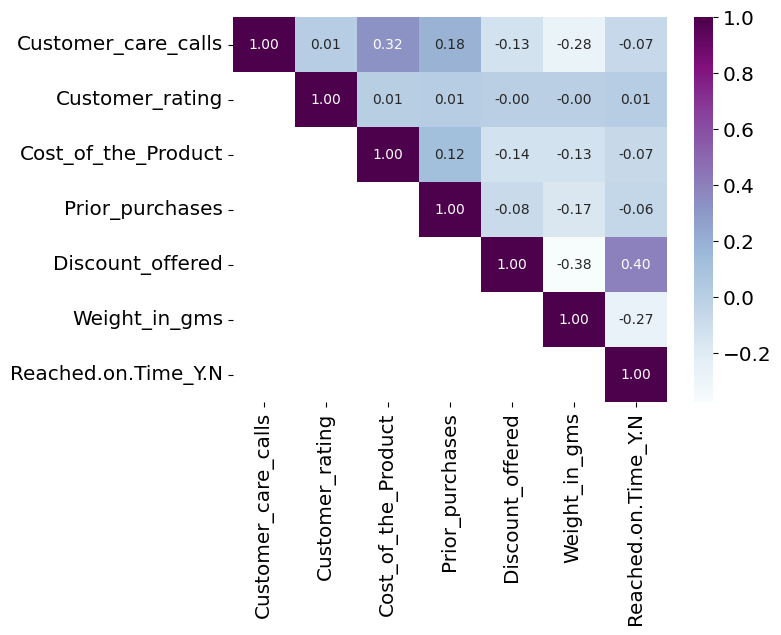

In [ ]:
corr = df.corr()
mask = np.ones_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = False
plt.figure(figsize=(7, 5))
sns.heatmap(corr, mask = mask, cmap='BuPu', annot=True, fmt='.2f');

Dari matriks korelasi di atas, kita dapat melihat bahwa :
- Variabel Target yaitu `Reached.on.Time_Y.N` memiliki hubungan (korelasi) sebagai berikut :
  - Lemah dengan variabel `Customer_Rating`, `Cost_of_the_Product`, dan `Prior_purchases`
  - Medium positif dengan variabel `Discount_offered`
  - Medium negatif dengan variabel `Weight_in_gms`
- Variabel lain yang saling berkorelasi medium atau kuat (>=0.3 atau <=-0.3) antara lain:
  - `Weight_in_gms` dengan `Discount_offered` berkorelasi medium negatif
  - `Customer_care_calls` dengan `Weight_in_gms` berkorelasi medium negatif
  - `Customer_care_calls` dengan `Cost_of_the_Product` berkorelasi medium positif

#### Berdasarkan diskon yang ditawarkan

Melalui *correlation heatmap* di atas, kita dapat mengetahui bahwa variabel diskon memiliki korelasi medium positif dengan variabel ketepatan waktu pengiriman. Artinya, semakin kecil diskon yang diberikan pada produk, pengirimannya akan cenderung tepat waktu. Dan sebaliknya apabila diskon yang diberikan pada produk semakin besar, maka pengirimannya akan cenderung tidak tepat waktu (terlambat). Untuk membuktikannya, mari kita lihat gambar grafik histogram berikut.

In [ ]:
px.histogram(data_frame = df, x = 'Discount_offered', nbins = 100, color = 'Reached',
             marginal = 'box')

Ternyata memang benar bahwa produk yang dikirim tepat waktu cenderung memiliki diskon yang kecil (< 10%). Hal ini dapat diartikan ada indikasi kalau Perusahaan lebih memprioritaskan pengiriman yang memiliki diskon < 10%. Logika yang menjelaskan asumsi ini adalah:
1. Kemungkinan produk dengan diskon < 10% memberikan keuntungan yang lebih besar sehingga Perusahaan lebih memprioritaskan pengirimannya.
2. Kemungkinan produk dengan diskon > 10% merupakan produk yang sedang dalam masa campaign (clearance stock, dsb) mengingat perusahaan bergerak di bidang elektronik, biasanya produk yang *outdated* akan dilakukan *clearance sale*.

#### Berdasarkan berat produk

Selain diskon produk, variabel lain yang memiliki korelasi medium dengan variabel ketepatan waktu pengiriman adalah berat produk. Variabel ini memiliki korelasi negatif yang artinya semakin berat produk yang dikirim, maka pengirimannya cenderung lebih tepat waktu, dan sebaliknya. Untuk membuktikannya, mari kita lihat gambar grafik histogram di bawah.

In [ ]:
px.histogram(data_frame = df, x = 'Weight_in_gms', nbins = 100, color = 'Reached',
             marginal = 'box')

Dari histogram di atas, dapat terlihat bahwa produk yang lebih berat (memiliki berat > 4kg) cenderung lebih banyak yang dikirim tepat waktu daripada produk yang memiliki berat < 4kg. Ada 2 hal penjelasan logis yang dapat menjelaskan hal ini :
1. Perusahaan cenderung berfokus pada pengiriman produk yang berat karena biasanya produk yang berat memiliki size yang besar dan tingkat kesulitan pengiriman yang lebih tinggi.
2. Barang yang memiliki berat yang lebih ringan cenderung memiliki size yang lebih kecil sehingga memiliki risiko mudah terselip atau hilang dalam pengiriman, hal ini seringkali menyebabkan keterlambatan pengiriman.

### Analisis Bivariat Pada Variabel Kategorikal

Pada tahap ini kita ingin mengetahui variabel kategorikal apa saja yang berpengaruh terhadap ketepatan waktu pengiriman. Pertama-tama mari kita lihat plot diagram batang di bawah.

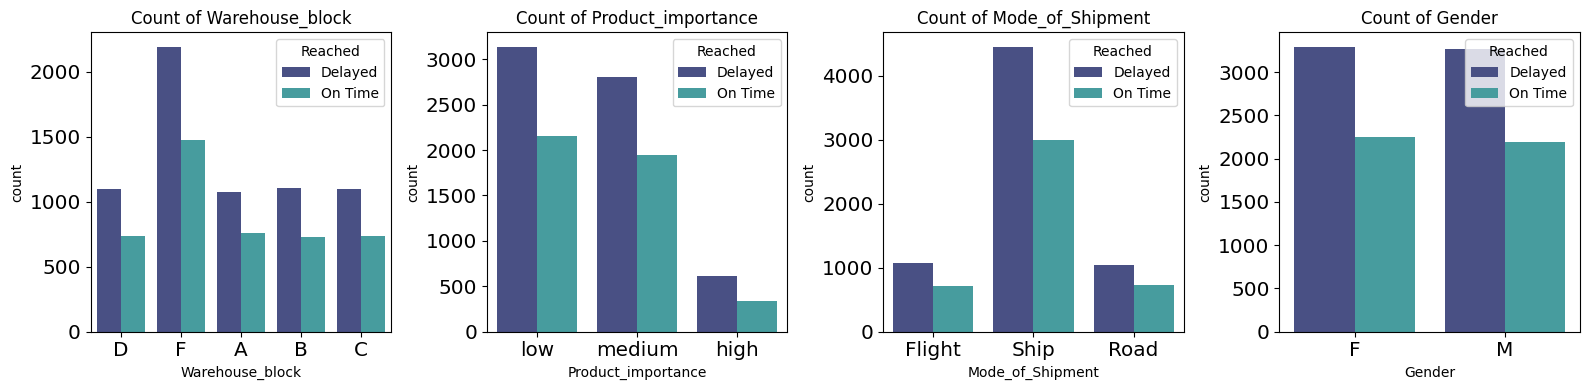

In [ ]:
plt.figure(figsize = (16, 4))

for i in range(len(cats)):
        plt.subplot(1, len(cats), i+1)
        sns.countplot(x = df[cats[i]], data = df, palette="mako", hue = 'Reached')
        plt.title(f'Count of {cats[i]}')
        plt.tight_layout()

Dari diagram batang diatas, pengaruh dari setiap variabel kategorikal terhadap ketepatan waktu pengiriman kurang terlihat karena semuanya terlihat memiliki proporsi yang sama. Untuk membuktikannya, kita dapat menggunakan uji Chi-square untuk menguji apakah suatu variabel memiliki pengaruh yang signifikan terhadap ketepatan waktu pengiriman.

Mari kita bangun sebuah hipotesis untuk mengujinya.

**Hipotesis** :
- Ho : Variabel kategorikal yang diuji tidak mempengaruhi variabel ketepatan waktu pengiriman (kedua variabel saling independen)
- Ha : Variabel kategorikal yang diuji mempengaruhi variabel ketepatan waktu pengiriman

In [ ]:
# Uji independensi pada variabel kategorikal
for i in range(len(cats)):
  contingency = pd.crosstab(df[cats[i]], df['Reached'])
  print(contingency)
  stat, pval, dof, expected = chi2_contingency(contingency)
  print(f'\nP-value for independence: {pval:.4f}')
  if pval<=0.05:
    print('Tolak Ho\n\n')
  else:
    print('Gagal menolak Ho\n\n')

Reached          Delayed  On Time
Warehouse_block                  
A                1075     758    
B                1104     729    
C                1094     739    
D                1096     738    
F                2194     1472   

P-value for independence: 0.8960
Gagal menolak Ho


Reached             Delayed  On Time
Product_importance                  
high                616      332    
low                 3140     2157   
medium              2807     1947   

P-value for independence: 0.0022
Tolak Ho


Reached           Delayed  On Time
Mode_of_Shipment                  
Flight            1069     708    
Road              1035     725    
Ship              4459     3003   

P-value for independence: 0.6895
Gagal menolak Ho


Reached  Delayed  On Time
Gender                   
F        3296     2249   
M        3267     2187   

P-value for independence: 0.6367
Gagal menolak Ho




Berdasarkan uji statistik di atas, dapat dilihat bahwa satu-satunya variabel yang Ho nya ditolak adalah `Product_importance` yang artinya variabel ini mempengaruhi ketepatan waktu pengiriman karena nilai P value (0.0022) <= alpha (0.05).

Mari kita lihat lebih lanjut pada grafik di bawah, bagaimana pengaruh variabel ini terhadap ketepatan waktu pengiriman.

In [ ]:
fig = px.sunburst(df,path=['Product_importance','Reached'],color = 'Reached', title = f'Proporsi Target Berdasarkan Product_importance')
fig.update_traces(textinfo='label+percent parent')
fig.show()

Ternyata produk dengan kategori `Product_importance` *high* cenderung mengalami keterlambatan pengiriman. Jika Perusahaan mengkategorikan `Product_importance` berdasarkan tingkat risiko (seperti mudah hilang, mudah dicuri, dsb), maka seharusnya produk dengan kategori ini lebih diprioritaskan pengirimannya oleh perusahaan untuk sampai kepada pelanggan tepat waktu.

# Kesimpulan dan Rekomendasi

Dari analisis yang telah dilakukan, kita bisa membuat kesimpulan umum dari data yang kita miliki :
- Dari 10999 data yang kita miliki, hanya 4436 produk (sekitar 40%) yang sampai tepat waktu, sisanya sebanyak 60% nya mengalami keterlambatan pengiriman.
- Perusahaan menggunakan metode pengiriman Ship sebagai yang utama.
- Perusahaan memiliki gudang tersendiri dan terpusat pada blok F.
- Mayoritas produk yang terjual mempunyai kategori `Product_importance` *low* dan *medium*.

Karakteristik produk yang TIDAK sampai tepat waktu (pengirimannya terlambat), adalah sebagai berikut :
- Produk yang cenderung memiliki berat yang lebih ringan (< 4kg).
- Produk dengan diskon di atas 10%.
- Produk yang mempunyai kategori `Product_importance` *high*.

**Rekomendasi**
1. Pemisahan sistem pengiriman barang yang berat dan ringan karena memiliki karakteristik yang berbeda. Hal ini dapat mendorong optimalisasi ketepatan waktu pengiriman.
2. Melakukan strategi ulang atas diskon Produk dan Service Pengiriman, baik produk yang sedang dalam masa campaign maupun tidak sehingga diharapkan penjualan produk yang dalam masa campaign dapat meningkat di kemudian hari.
3. Produk yang memiliki tingkat importance tinggi direkomendasikan untuk ditangani pengirimannya oleh tim yang lebih handal.

Dengan adanya analisis ini, diharapkan perusahaan dapat meningkatkan optimalisasi dan efisiensi waktu dalam sistem pengirimanya.